# Impact of $c_s^2$ on observables

Usual dark energy models assume an effective sound speed of $c_s^2 = 1$. What is the impact of another choice, *e.g.* $c_s^2 = 0$?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb

In [2]:
H0 = 67
h = H0/100
omegab = 0.049
omegam = 0.319
omegac = omegam - omegab
As = 2.1e-9
ns = 0.96
tau = 0.07
ombh2 = omegab*h*h
omch2 = omegac*h*h
# DESI DR2 BAO + CMB + Pantheon+ mean
w0 = -0.838
wa = -0.62
ks = np.logspace(-3, 0.1, 200)
redshifts = np.linspace(0, 2, 100)

In [3]:
# Case 1: cs2 = 1
cosmo = camb.set_params(
    H0=H0, ombh2=ombh2, omch2=omch2, As=As, ns=ns, tau=tau,
    num_nu_massless=3.044, WantTransfer=True, w0=w0, wa=wa, dark_energy_model="ppf",
    cs2_type=camb.dark_energy.Cs2_Constant, cs2_0=1
)
cosmo.set_for_lmax(2000, lens_potential_accuracy=1)
cosmo.set_matter_power(redshifts=redshifts, kmax=20, silent=True, nonlinear=True)
camb_results = camb.get_results(cosmo)
P_lin_quint = camb_results.get_matter_power_interpolator(nonlinear=None).P(0, ks)
P_nl_quint = camb_results.get_matter_power_interpolator().P(0, ks)
fsigma8_quint = camb_results.get_fsigma8()
cl_tt_quint = camb_results.get_lensed_scalar_cls(CMB_unit='muK')[:,0]
cl_pp_quint = camb_results.get_lens_potential_cls(lmax=2000)[:,0]

In [ ]:
# Case 2: cs2 = 0
cosmo = camb.set_params(
    H0=H0, ombh2=ombh2, omch2=omch2, As=As, ns=ns, tau=tau,
    num_nu_massless=3.044, WantTransfer=True, w0=w0, wa=wa, dark_energy_model="ppf",
    cs2_type=camb.dark_energy.Cs2_Constant, cs2_0=0
)
cosmo.set_for_lmax(2000, lens_potential_accuracy=1)
cosmo.set_matter_power(redshifts=redshifts, kmax=20, silent=True, nonlinear=True)
camb_results = camb.get_results(cosmo)
P_lin_clust = camb_results.get_matter_power_interpolator(nonlinear=None).P(0, ks)
P_nl_clust = camb_results.get_matter_power_interpolator().P(0, ks)
fsigma8_clust = camb_results.get_fsigma8()
cl_tt_clust = camb_results.get_lensed_scalar_cls(CMB_unit='muK')[:,0]
cl_pp_clust = camb_results.get_lens_potential_cls(lmax=2000)[:,0]

In [16]:
# Case 3: cs2 dynamical, cs2=0 in the past, cs2=1 today
#     cs2_0 + cs2_1*(w0+wa) = 0
# (-) cs2_0 + cs2_1*w0      = 1
# -------------------
#     cs2_1*wa = -1
#     cs2_0 = 1 - cs2_1*w0
cs2_1 = -1/wa - 0.001 # NOTE: the -0.001 term is just to have a small breathing room to be within 0 and 1
cs2_0 = 1 - cs2_1*w0
cosmo = camb.set_params(
    H0=H0, ombh2=ombh2, omch2=omch2, As=As, ns=ns, tau=tau,
    num_nu_massless=3.044, WantTransfer=True, w0=w0, wa=wa, dark_energy_model="ppf",
    cs2_type=camb.dark_energy.Cs2_PropToW, cs2_0=cs2_0, cs2_1=cs2_1
)
cosmo.set_for_lmax(2000, lens_potential_accuracy=1)
cosmo.set_matter_power(redshifts=redshifts, kmax=20, silent=True, nonlinear=True)
camb_results = camb.get_results(cosmo)
P_lin_grow = camb_results.get_matter_power_interpolator(nonlinear=None).P(0, ks)
P_nl_grow = camb_results.get_matter_power_interpolator().P(0, ks)
fsigma8_grow = camb_results.get_fsigma8()
cl_tt_grow = camb_results.get_lensed_scalar_cls(CMB_unit='muK')[:,0]
cl_pp_grow = camb_results.get_lens_potential_cls(lmax=2000)[:,0]

In [17]:
# Case 4: cs2 dynamical, cs2=1 in the past, cs2=0 today
#     cs2_0 + cs2_1*(w0+wa) = 1
# (-) cs2_0 + cs2_1*w0      = 0
# -------------------
#     cs2_1*wa = 1
#     cs2_0 = -cs2_1*w0
cs2_1 = 1/wa + 0.001 # NOTE: the -0.001 term is just to have a small breathing room to be within 0 and 1
cs2_0 = -cs2_1*w0
cosmo = camb.set_params(
    H0=H0, ombh2=ombh2, omch2=omch2, As=As, ns=ns, tau=tau,
    num_nu_massless=3.044, WantTransfer=True, w0=w0, wa=wa, dark_energy_model="ppf",
    cs2_type=camb.dark_energy.Cs2_PropToW, cs2_0=cs2_0, cs2_1=cs2_1
)
cosmo.set_for_lmax(2000, lens_potential_accuracy=1)
cosmo.set_matter_power(redshifts=redshifts, kmax=20, silent=True, nonlinear=True)
camb_results = camb.get_results(cosmo)
P_lin_drop = camb_results.get_matter_power_interpolator(nonlinear=None).P(0, ks)
P_nl_drop = camb_results.get_matter_power_interpolator().P(0, ks)
fsigma8_drop = camb_results.get_fsigma8()
cl_tt_drop = camb_results.get_lensed_scalar_cls(CMB_unit='muK')[:,0]
cl_pp_drop = camb_results.get_lens_potential_cls(lmax=2000)[:,0]

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_39726/1172390076.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("$k (h/\mathrm{Mpc})$")


Text(0.5, 1.0, 'Impact of sound speed in the matter power spectrum')

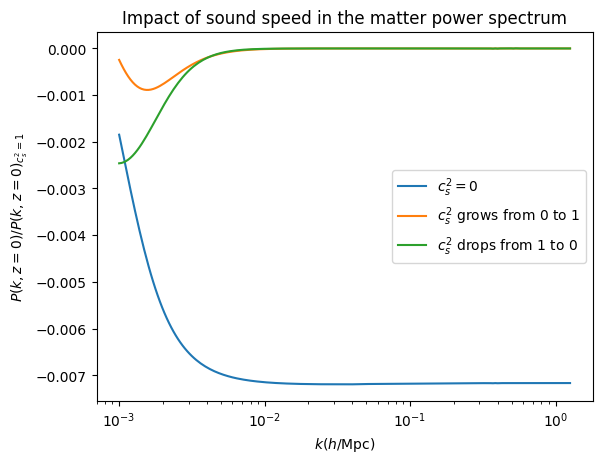

In [18]:
# Plot P(k)
plt.semilogx(ks, P_lin_clust/P_lin_quint - 1, label="$c_s^2 = 0$")
plt.semilogx(ks, P_lin_grow/P_lin_quint - 1, label="$c_s^2$ grows from 0 to 1")
plt.semilogx(ks, P_lin_drop/P_lin_quint - 1, label="$c_s^2$ drops from 1 to 0")
plt.xlabel("$k (h/\mathrm{Mpc})$")
plt.ylabel("$P(k, z=0)/P(k, z=0)_{c_s^2 = 1}$")
plt.legend()
plt.title("Impact of sound speed in the matter power spectrum")

Text(0.5, 1.0, 'Impact of the sound speed on $f\\sigma_8$')

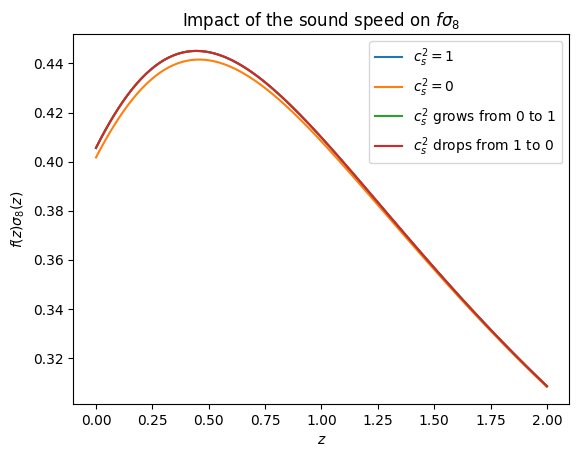

In [19]:
plt.plot(redshifts, fsigma8_quint[::-1], label="$c_s^2 = 1$")
plt.plot(redshifts, fsigma8_clust[::-1], label="$c_s^2 = 0$")
plt.plot(redshifts, fsigma8_grow[::-1], label="$c_s^2$ grows from 0 to 1")
plt.plot(redshifts, fsigma8_drop[::-1], label="$c_s^2$ drops from 1 to 0")
plt.xlabel("$z$")
plt.ylabel("$f(z)\\sigma_8(z)$")
plt.legend()
plt.title("Impact of the sound speed on $f\\sigma_8$")

Text(0.5, 1.0, 'Impact of the sound speed on $f\\sigma_8$')

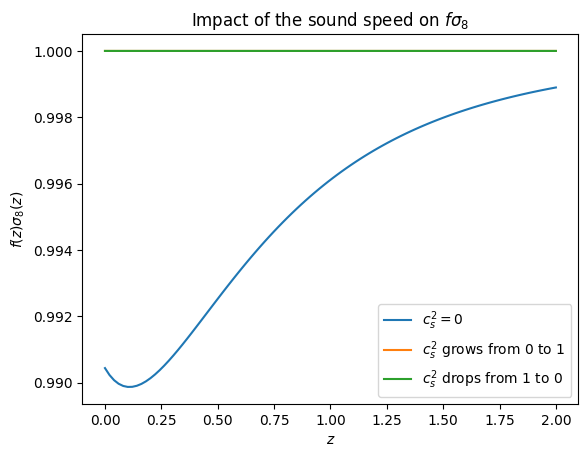

In [20]:
plt.plot(redshifts, fsigma8_clust[::-1]/fsigma8_quint[::-1], label="$c_s^2 = 0$")
plt.plot(redshifts, fsigma8_grow[::-1]/fsigma8_quint[::-1], label="$c_s^2$ grows from 0 to 1")
plt.plot(redshifts, fsigma8_drop[::-1]/fsigma8_quint[::-1], label="$c_s^2$ drops from 1 to 0")
plt.xlabel("$z$")
plt.ylabel("$f(z)\\sigma_8(z)$")
plt.legend()
plt.title("Impact of the sound speed on $f\\sigma_8$")

/tmp/ipykernel_39726/6374705.py:1: RuntimeWarning: invalid value encountered in divide
  plt.semilogx(np.arange(2001), cl_pp_clust/cl_pp_quint, label="$c_s^2 = 0$")
/tmp/ipykernel_39726/6374705.py:2: RuntimeWarning: invalid value encountered in divide
  plt.semilogx(np.arange(2001), cl_pp_grow/cl_pp_quint, label="$c_s^2$ grows from 0 to 1")
/tmp/ipykernel_39726/6374705.py:3: RuntimeWarning: invalid value encountered in divide
  plt.semilogx(np.arange(2001), cl_pp_drop/cl_pp_quint, label="$c_s^2$ drops from 1 to 0")


Text(0.5, 1.0, 'Impact of $c_s^2$ on CMB lensing')

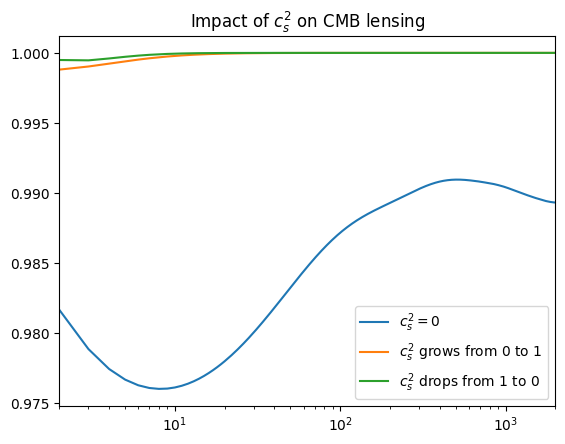

In [21]:
plt.semilogx(np.arange(2001), cl_pp_clust/cl_pp_quint, label="$c_s^2 = 0$")
plt.semilogx(np.arange(2001), cl_pp_grow/cl_pp_quint, label="$c_s^2$ grows from 0 to 1")
plt.semilogx(np.arange(2001), cl_pp_drop/cl_pp_quint, label="$c_s^2$ drops from 1 to 0")
plt.xlim([2, 2000])
plt.legend()
plt.title("Impact of $c_s^2$ on CMB lensing")

/tmp/ipykernel_39726/3326341707.py:1: RuntimeWarning: invalid value encountered in divide
  plt.semilogx(np.arange(2051), cl_tt_clust/cl_tt_quint, label="$c_s^2 = 0$")
/tmp/ipykernel_39726/3326341707.py:2: RuntimeWarning: invalid value encountered in divide
  plt.semilogx(np.arange(2051), cl_tt_grow/cl_tt_quint, label="$c_s^2$ grows from 0 to 1")
/tmp/ipykernel_39726/3326341707.py:3: RuntimeWarning: invalid value encountered in divide
  plt.semilogx(np.arange(2051), cl_tt_drop/cl_tt_quint, label="$c_s^2$ drops from 1 to 0")


Text(0.5, 1.0, 'Impact of $c_s^2$ on CMB TT')

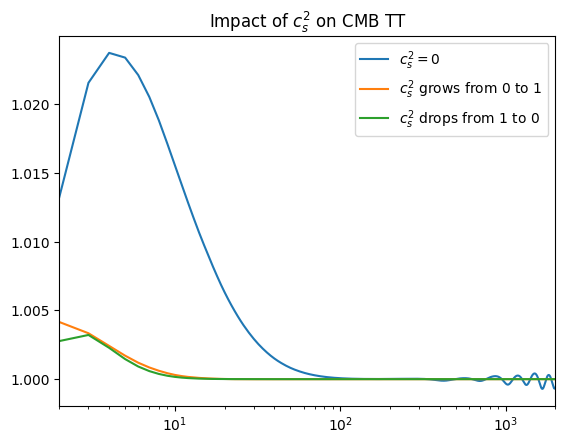

In [22]:
plt.semilogx(np.arange(2051), cl_tt_clust/cl_tt_quint, label="$c_s^2 = 0$")
plt.semilogx(np.arange(2051), cl_tt_grow/cl_tt_quint, label="$c_s^2$ grows from 0 to 1")
plt.semilogx(np.arange(2051), cl_tt_drop/cl_tt_quint, label="$c_s^2$ drops from 1 to 0")
plt.xlim([2, 2000])
plt.legend()
plt.title("Impact of $c_s^2$ on CMB TT")